### Grupo 4
### Miguel Egido Morales, Ana Robledano Abasolo, Alfredo Robledano Abasolo
# P3 AA Redes de Neuronas Convolucionales

In [1]:
from time import perf_counter
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
#t0 = perf_counter()
#(ds_train, ds_test), ds_info = tfds.load('cifar100',
#               split=['train', 'test'],
#               batch_size=-1,
#               with_info=True)
#t1 = perf_counter()
#print('Elapsed: ', t1-t0)

In [3]:
#class_info = ds_info.features['label'].names
#super_class_info = ds_info.features['coarse_label'].names
#class_dict = {i: class_name for i, class_name in enumerate(class_info)}
#super_class_dict = {i: class_name for i, class_name in enumerate(super_class_info)}
#print(super_class_dict)

In [4]:
#import matplotlib.pyplot as plt

#fig = plt.figure(figsize=(12, 8))

#plt.subplot(2, 2, 1)
#plt.imshow(ds_train['image'][30_000].numpy())
#plt.title(f":{ds_train['coarse_label'][30_000].numpy()}")

In [13]:
t0 = perf_counter()
ds, ds_info = tfds.load('cifar100',
               shuffle_files=True,
               with_info=True)
t1 = perf_counter()
print('Elapsed: ', t1-t0)

Elapsed:  0.08793592199981504


In [17]:
ds_train = ds['train'].map(lambda x: {'image': x['image'],
                                      'label': x['label'],
                                      'coarse_label': x['coarse_label']})
validation_size = int(0.2 * ds_info.splits['train'].num_examples)

ds_validation = ds_train.take(validation_size)
ds_train = ds_train.skip(validation_size)

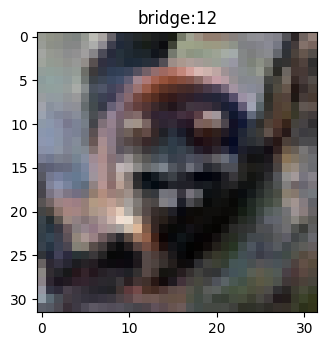

In [32]:
import matplotlib.pyplot as plt
#for data1, data2 in zip(ds_train, ds_validation):
peek = ds_validation.take(1).as_numpy_iterator()
fig = plt.figure(figsize=(12, 8))
for arr in peek:
  plt.subplot(2, 2, 1)
  plt.imshow(arr['image'])
  plt.title(f"{ds_info.features['label'].names[arr['coarse_label']]}:{arr['coarse_label']}")

'apple'